In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)) & (d.i == 0) &]

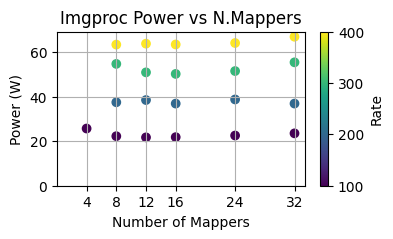

In [4]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nmappers'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xticks(d2.nmappers.unique())
plt.xlabel('Number of Mappers')
plt.ylabel('Power (W)')
plt.title('Imgproc Power vs N.Mappers')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
plt.savefig("Imgproc.pdf")
